# Chapter 20. 신경망

## 20.0 소개
* 신경망의 핵심은 유닛(노드, 뉴런) 이다.
    * 유닛 : 하나 이상의 입력을 받아 각 입력에 파라미터(가중치)를 곱한다.
    * 가중치가 곱해진 입력에 어떤 bias 값(0)을 더하고 활성화 함수에 이를 전달한다.
    * 출력은 신경망에서 만약 있다면 더 깊은 층에 있는 다른 뉴런을 위해 앞으로 전달한다.
* 피드포워드 신경망 혹은 다층 퍼셉트론 : 다양한 실전 환경에서 사용되는 가장 간단한 인공 신경망이다.
    * 신경망이 일련의 연결된 층으로 표현할 수 있고, 한쪽 끝에는 샘플의 특성값과 다른 한쪽에는 타깃값을 연결한 네트워크 이다.
    * 피드포워드 : 샘플의 특성값이 네트워크 앞쪽으로 주입된다는 사실에서 착안한다.
    * 각 층은 연속적으로 특성값을 변환하여 타깃값과 같은 최종 출력을 내는 게 목적이다.

* 피드 포워드 신경망 : 입력층(input layer), 출력층(output layer), 은닉층(hidden layer)

## 20.1 신경망을 위한 데이터 전처리하기
* StandardScaler로 특성을 표준화한다.

In [6]:
from sklearn import preprocessing
import numpy as np

features = np.array([[-100.1, 3240.1],
                    [-200.2, -234.1],
                    [5000.5, 150.1],
                    [6000.6, -125.1],
                    [9000.9, -673.1]])

scaler = preprocessing.StandardScaler()

# 특성 변환
features_standardized = scaler.fit_transform(features)

# 특성 확인
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

* 신경망의 모델 파라미터는 작은 난수로 초기화한다.
    * 특성값이 모델 파라미터보다 크면 종종 신경망의 성능이 나빠진다.
    * 샘플의 특성값이 개별 유닛을 통과하면서 합쳐지므로, 모든 특성은 같은 스케일을 가져야 한다.
    * 그래서 각 특성을 모두 평균이 0이고 표준편차 1이되도록 표준화하는 게 가장 좋다.(필수 아니고, 이진 특성인 경우 예외)
    

In [7]:
print("평균:", round(features_standardized[:, 0].mean()))
print("표준편차:", features_standardized[:, 0].std())

평균: 0.0
표준편차: 0.9999999999999999


## 20.2 신경망 구성하기
* 케라스의 Sequential 모델 활용

In [7]:
from keras import models
from keras import layers

# 신경망 모델을 만든다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층을 추가한다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(10, )))

network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정 완료
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 정확도를 성능 지표로 한다.


* 자주 쓰는 조합 확인
    * 이진 분류 : 시그모이드 함수와 하나의 유닛
    * 다중 분류 : 소프트맥스 활성화 함수와 k 개의 유닛(k : 타깃 클래스의 개수)
    * 회귀 : No 활성화 함수
* 손실 함수 정의(예측값이 타깃값과 얼마나 잘 맞는지 측정 함수)
    * 이진 분류 : 이진 크로스 엔트로피
    * 다중 분류 : 범주형 크로스 엔트로피
    * 회귀 : 평균 제곱 오차

* 옵티 마이저 정의 : 가장 작은 손실 함수 오차를 만드는 모델 파라미터 값 찾기
    * 확률적 경사 하강법, 모멘텀(momentum)
    * RMSProp(Root Mean Square Propagation), Adam(Adaptive Moment estimation)
* 하나 이상의 성능 지표(정확도 등)

* 신경망 제작 방법 두 가지 : 층을 쌓는 방식, 함수형 API(functional API)

In [8]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


* 첫번째 은닉층 : units=16, activation='relu'
    * 렐루 활성화 함수를 가진 16개 유닛 구성
    * 케라스에서 네트워크의 첫 번째 은닉층 : input_shape 파라미터 포함해야 한다.
    * (10,) : 첫 층이 10개의 특성을 가진 샘플을 기대한다.
* 두번째 층 : input_shape 매개변수만 없다. 나머지는 동일하다.
* 출력층 : 이진 분류가 목적이므로 시그모이드 활성화 함수 사용한 유닛 하나만 포함한다.
* 모델 훈련을 위해 케라스에게 네트워크의 훈련 방법 알려준다.
    * compile 메서드 :: 최적화 알고리즘(RMSProp), 손실 함수(binary_crossentropy), 하나 이상의 성능 지표를 지정한다.

* 케라스 summary 메서드 : 추가된 층 수와 가중치 개수를 보여준다.
    * 첫번째 차원은 배치 차원으로, 모델 구성시 None 으로 설정 된다.
    * 160개 가중치 + 16개 절편(bias) = 176개와 일치한다.
    * 첫 입력층은 입력값 자체이며 훈련되는 가중치가 없다. 그래서 은닉층 2개와 출력층 1개만 확인할 수 있다.

In [9]:
# 입력에서 출력까지 3 개의 완전 연결층을 연결한다.
x = layers.Input(shape=(10,))
h1 = layers.Dense(units=16, activation="relu")(x)
h2 = layers.Dense(units=16, activation="relu")(h1)
y = layers.Dense(units=1, activation="sigmoid")(h2)

In [10]:
# 신경망 모델 제작
network = models.Model(x, y)

# 신경망 모델 설정 완료
network.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [11]:
network.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


* Dense 클래스의 객체 생성 부분 + 입력값 주입 부분 나누어 쓰면 더 쉽게 이해할 수 있다.

In [12]:
dense = layers.Dense(units=16, activation="relu")
h1 = dense(x)

* 파이썬 객체 호출시 특수 메서드 __call__ 실행
    * Dense 층의 정방향 계산(forward propagation) 수행

## 20.3 이진 분류기 훈련하기
* 케라스 사용해서 피드포워드 신경망 만들고 fit 메서드로 훈련

In [19]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수를 지정한다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features
)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 이용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# 렐루 활성화 함수를 이용한 완전 연결층
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정 완료
network.compile(loss="binary_crossentropy", # 손실 함수 : 이진 크로스엔트로피
optimizer="rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표

# 신경망 훈련
history = network.fit(features_train, # 특성
target_train,
epochs=3, # 에폭 횟수
verbose=1, # 에폭 과정을 출력
batch_size = 100, # 배치의 샘플 개수
validation_data=(features_test, target_test) # 테스트 데이터
)



Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 0s 18us/step - loss: 0.4195 - accuracy: 0.8120 - val_loss: 0.3394 - val_accuracy: 0.8546
Epoch 2/3
25000/25000 [==============================] - 0s 14us/step - loss: 0.3225 - accuracy: 0.8641 - val_loss: 0.3284 - val_accuracy: 0.8594
Epoch 3/3
25000/25000 [==============================] - 0s 14us/step - loss: 0.3107 - accuracy: 0.8691 - val_loss: 0.3392 - val_accuracy: 0.8537


In [20]:
# 특성 행렬의 크기 확인

features_train.shape

(25000, 1000)

* epochs : 훈련할 때 사용할 에폭 횟수 정의
* verbose : 훈련 과정 동안 얼마나 많은 정보 출력할지 결정한다.
    * verbose = 0 : 출력 없음
    * verbose=1 : 진행 막대 출력
    * verbose=2 : 에폭당 한 줄씩 로그 출력
* batch_size : 모델 파라미터 업데이트 전에 네트워크 통과시킬 샘플 개수 설정
* 모델 평가 위해 사용할 테스트 세트 보관 : validation_data 변수 활용 혹은 validation_split 파라미터로 평가에 사용할 비율 사전 정의 가능하다.
* 케라스의 fit : 에폭마다 손실값 + 성능 수치 담긴 History 객체 반환(사이킷런은 훈련 모델을 반환)

In [22]:
# 신경망의 모델 설정 완료
network.compile(loss="binary_crossentropy",
optimizer = "rmsprop")

# 신경망 훈련한다.
history = network.fit(features_train,
target_train,
epochs=3,
verbose=1,
batch_size=100,
validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 20us/step - loss: 0.3025 - val_loss: 0.3257
Epoch 2/3
25000/25000 [==============================] - 0s 14us/step - loss: 0.2933 - val_loss: 0.3304
Epoch 3/3
25000/25000 [==============================] - 0s 14us/step - loss: 0.2819 - val_loss: 0.3268


In [23]:
network.evaluate(features_test, target_test)

25000/25000 [==============================] - 0s 10us/step


0.3267870804977417

* 케라스 내 IMDB 데이터 : 텍스트를 정수의 리스트로 변환한 것이다.
    * Tokenizer 클래스 num_words 파라미터 지정 후 sequences_to_matrix 메서드 호출
        * num_words보다 큰 정수는 모두 제외하고 mode 파라미터에서 지정한 방식에 맞추어 행렬 제작
        * mode = binary : 시퀀스에 등장한 정수에 해당하는 위치에 1 저장
        * mode = count : 그 횟수 자체를 저장
        * mode = freq : 등장 횟수를 시퀀스의 길이로 나눈다.

## 20.4 다중 분류기 훈련하기
* 케라스 사용해서 출력층에 소프트맥스 활성화 함수를 사용하는 피드포워드 신경망 구성

In [2]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers


# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수를 지정한다.
number_of_features = 5000

# 특성과 타깃 데이터 로드
data= reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# 특성 데이터를 원-핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 타깃 벡터를 원-핫 인코딩하여 타깃 행렬 제작
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features, )))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=46, activation="softmax"))

# 신경망의 모델 설정을 완료
network.compile(loss="categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train,
target_train,
epochs=3,
verbose=0,
batch_size=100,
validation_data=(features_test, target_test))


2113536/2110848 [==============================] - 424s 200us/step



* 이진 분류기들과 차이점
1. 사용 데이터가 11228개 로이터 뉴스
    * 각 뉴스가 46개 토픽으로 분류되어 있고, 이 뉴스를 5000개 이진 특성으로 변환하여 특성 데이터 준비
    * 샘플이 속한 46개 클래스를 나타내는 타깃 행렬을 얻고자 원-핫 인코딩하여 타깃 데이터 준비

2. 신경망이 46개 클래스 사이에 더 복잡한 관계 표현하도록 은닉층 유닛 수를 늘린다.
3. 다중 분류 문제 : 출력층에 소프트맥스 활성화 함수와 46개 유닛(클래스 당 하나씩) 사용
    * 소프트맥스 활성화 함수 : 46개 값(총합 1)을 담은 배열을 반환한다.
    * 46개 값 : 46개 클래스마다 소속될 확률
4. 다중 분류에 맞는 손실 함수인 **범주형 크로스엔트로피** 사용을 위해 CATEGORICAL_CROSSENTROPY 설정

In [5]:
# 타깃 행렬을 확인한다.
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 20.5 회귀 모델 훈련하기
* 케라스 사용해서 활성화 함수 없이 출력 유닛 하나로 구성된 피드포워드 신경망 제작

In [21]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 랜덤 시드 설정
np.random.seed(0)

# 특성 행렬과 타깃 벡터 제작
features, target = make_regression(n_samples= 10000,
n_features=3,
n_informative=3,
n_targets=1,
noise=0.0,
random_state=0)

# 데이터 훈련 세트와 테스트 세트로 나눈다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, random_state=0)

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=32,
                        activation="relu",
                        input_shape=(features_train.shape[1],)))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=32, activation="relu"))

# 활성화 함수가 없는 완전 연결층 추가
network.add(layers.Dense(units=1))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=32, activation="relu"))

# 활성화 함수가 없는 완전 연결층 추가
network.add(layers.Dense(units=1))

# 신경망의 모델 설정 완료
network.compile(loss="mse", # 평균 제곱 오차
                optimizer="RMSprop", # 옵티마이저
                metrics=["mse"]) # 성능 지표


# 신경망 훈련
history = network.fit(
    features_train, # 특성
    target_train, # 타깃 벡터
    epochs=10, # 에폭 횟수
    verbose=0, # 출력 없다.
    batch_size=100, # 배치의 샘플 개수
    validation_data=(features_test, target_test) # 테스트 데이터
)

$$ MSE = {1\over n} {\sum_{i=1}^n (\hat{y}_i - y_i)^2} $$

* 연속적인 값을 예측하는 신경망
    * 시그모이드 활성화 함수를 제거하여, 0과 1 사이로 제한하는 것을 없애면 연속적인 값을 출력 가능하다.
    * 회귀 모델 훈련하므로, 평균 제곱 오차로 손실 함수 및 평가 지표를 지정한다.
* 사이킷런의 make_regression 함수 모의 데이터 사용 : 특성을 표준화할 필요가 없다.
    * 그러나 실전에서는 거의 모든 경우 **표준화** 필요.

## 20.6 예측하기
* 케라스 사용해 피드포워드 신경망 제작 및 predict 메서드로 예측 결과 제작

In [24]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 10000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# IMDB 데이터를 원핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16,
activation='relu',
input_shape=(number_of_features, )))

# 렐루 활성화 함수 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수 완전 연결층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정 완료
network.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train, # 특성
target_train, # 타깃 벡터
epochs=3, # 에폭 횟수
verbose=0, # 출력 없음
batch_size=100, # 배치의 샘플 개수
validation_data=(features_test, target_test)) # 테스트 데이터

# 테스트 세트의 클래스 예측
predicted_target = network.predict(features_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


* 케라스 예측은 쉽다.
    * 신경망 훈련 후 특성을 매개변수로 받는 predict 메서드로 각 샘플의 예측값 반환
    * network.predict가 핵심이다. 해결에서 이진 분류 신경망을 만들었으니, 예측 결과는 1이 될 확률이다.
    * 1에 아주 가까운 값으로 예측된 샘플은 1일 가능성이 매우 높다. 반대도 마찬가지이다.

In [25]:
# 첫 번째 샘플이 클래스 1이 될 확률을 확인한다.
predicted_target[0]

array([0.06130877], dtype=float32)

## 20.7 훈련 기록 시각화하기
* 가장 좋은 신경망의 손실이나 정확도 점수 찾기
* matplotlib 라이브러리 사용해 에폭마다 훈련 세트와 테스트 세트의 손실 시각화

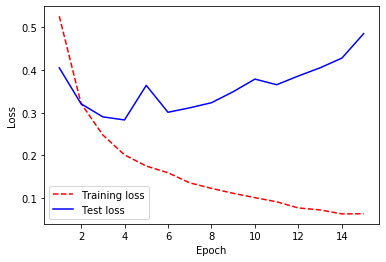

In [43]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# 랜덤 시드 설정한다.
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 10000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터 로드하기
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환한다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가, 이때는 units=1로 제한된다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델 설정을 종결시킨다. 컴파일 시작.
network.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train, # 특성
target_train, # 타깃
epochs=15, # 에폭 횟수
verbose=0, # 출력 제거
batch_size=1000, # 배치 당 샘플 개수
validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록 저장
training_loss = history.history["loss"]
test_loss = history.history["val_loss"] # 검증 손실은 히스토리 내부에 존재하는 val_loss를 선택한다.and

# 에폭 횟수를 사용해서 카운트 객체 만든다.


epoch_count = range(1, len(training_loss) + 1)

# 손실값 기록 시각화
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

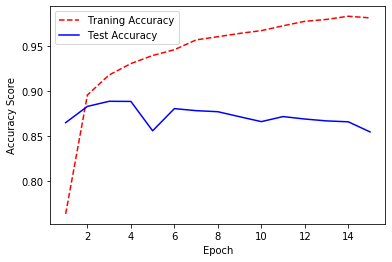

In [42]:
# 같은 방식으로 에폭마다 훈련 정확도와 테스트 정확도 그래프 그리기

# 훈련 정확도 및 검증 정확도 기록 저장
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프 그리기
plt.legend(["Traning Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();



* 신경망 : 성능이 초반에 안 좋다. 
* 훈련 데이터를 학습함에 따라 테스트 세트에 대한 모델의 오차가 감소하는 경향을 보인다.
* 특정 지점 부터 과적합하게 되며, 훈련 오차가 감소하나 테스트 오차가 증가하기 시작한다.
    * 테스트 오차가 가장 낮은 지점이 최적점이 된다.
    * 해결에 있는 에폭 대비 훈련 손실과 테스트 손실 그래프에서 잘 볼 수 있다.
        * 여기서는 4 ~ 5 에폭에서 가장 낮고 그 이후부터 훈련 손실이 감소하나 테스트 손실이 증가함을 확인할 수 있다.

## 20.8 가중치 규제로 과대적합 줄이기
* 과대적합 줄이자.
* 가중치 규제(weight regularization) : 네트워크의 모델 파라미터에 제한을 준다.

In [46]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드한다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# 영화 리뷰 데이터를 ㅜ언핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가(출력층)
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델 설정 컴파일
network.compile(
    loss="binary_crossentropy",#손실 함수
    optimizer="rmsprop",# 옵티마이저
    metrics=["accuracy"] # 성능 지표
    )

# 신경망 훈련
history = network.fit(features_train,# 특성
                        target_train, # 타깃 벡터
                        epochs=20, # 에폭 횟수
                        verbose=0, # 출력 없음
                        batch_size=100, # 배치의 샘플 개수
                        validation_data=(features_test, target_test)) # 테스트 데이터

* callbacks가 사라진 것으로 보인다.

* 신경망의 과적합 전략
    * 신경망의 모델 파라미터(가중치)가 작은 값을 갖도록 제한을 가한다.
    * 더 간단한 모델을 만들기 때문에 과적합 가능성이 적다.
        * **가중치 규제** 혹은 **가중치 감소(weights decay)**라고 부른다.
    * 가중치 규제로 L2 노름 같은 패널티를 손실 함수에 추가한다.
* 케라스 층의 매개변수 : kernel_regularizer=regularizers.l2(0.01) 지정
    * 가중치 규제를 추가할 수 있다.
    * 0.01 : 큰 쪽의 모델 파라미터 값에 얼마나 패널티를 부여할지를 결정한다. 

* keras_regularizers 모듈 : l1, l2, l1_l2 함수로 지정할 수 있다.
    * l1, l2, l1_l2(l1=0.01, l2=0.01) 이렇게 규제를 조절할 수 있다.
    * l1_l2 : 엘라스틱 넷 패널티 부여 가능
    * 함수 기본값의 경우 명시적으로 전달하지 않고 문자열로 지정할 수도 있다.

In [50]:
network.add(layers.Dense(units=16,
activation="relu",
kernel_regularizer="l1_l2",
input_shape=(number_of_features,)))

## 20.9 조기종료로 과대적합 줄이기
* 테스트 손실이 더 이상 감소하지 않을 때 훈련을 멈춘다.(조기 종료, early stopping)

In [51]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드한다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원핫 인코딩된 특성 행렬로 변환한다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16,
activation="relu",
input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

# 훈련을 조기종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정한다.
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
ModelCheckpoint(filepath="best_model.h5",
                monitor="val_loss",
                save_best_only=True)]

# 신경망 훈련
history = network.fit(features_train,
target_train,
epochs=20,
callbacks=callbacks,
verbose=0,
batch_size=100,
validation_data=(features_test, target_test))

* 훈련 초기에는 훈련 오차와 테스트 오차가 감소한다.
    * 특정 지점에서 네트워크가 훈련 데이터를 **기억**하기 시작한다.
    * 훈련 오차가 그래서 계속 감소하나 테스트 오차는 증가하기 시작한다.
    * 과대적합 발생한다.
    * 조기 종료 : 훈련 과정을 감시하여 테스트 오차가 증가하기 시작할 때 훈련 중지한다.(콜백 함수 in 케라스)

* ModelCheckpoint : 에폭마다 모델을 파일에 저장
    * save_best_only=True로 지정하면, 최선의 모델만 저장한다.

## 20.10 드롭아웃으로 과대적합 줄이기
* 드롭아웃(dropout) : 네트워크에 구조적으로 잡음 추가

In [54]:
import numpy as numpy
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_Test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델 제작
network = models.Sequential()

# 입력층으로 드롭아웃 추가
network.add(layers.Dropout(0.2, input_shape=(number_of_features, )))

# 렐루 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 드롭 아웃 층을 추가
network.add(layers.Dropout(0.5))

# 다시 렐루 활성화 함수 사용한 완전 연결층 추가
network.add(layers.Dense(units=16, activation="relu"))

# 드롭 아웃 층을 추가
network.add(layers.Dropout(0.5))

# 시그모이드 활성화 함수 사용한 완전 연결층(출력층) 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델 설정 컴파일
network.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train,
target_train,
epochs=3,
verbose=0,
batch_size=100,
validation_data=(features_test, target_test))


* 드롭아웃 : 신경망 규제하는 강력하고 인기 높은 방법.


## 20.11 모델 훈련 진행 과정을 저장하기
* 콜백 함수 ModelCheckpoint 사용해서 에폭이 끝날 때마다 모델 저장

In [56]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원핫 인코딩된 특성 행렬로 변환
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만든다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결층을 추가한다.
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

# 다시 렐루 추가
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수 사용한 완전 연결층 추가(출력)
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델 설정
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
optimizer = "rmsprop", # 옵티마이저
metrics=["accuracy"]) # 성능 지표

# 훈련 조기 종료 및 최선의 모델 저장을 위해 콜백 함수 설정
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# 신경망 훈련
history = network.fit(features_train,
target_train,
epochs=5,
callbacks=checkpoint,
verbose=0,
batch_size=100,
validation_data=(features_test, target_test)) # 테스트 데이터

* 조기 중단
    * ModelCheckpoint, EarlyStopping 함께 사용하여 테스트 오차가 더 증가되지 않을 때를 관찰하고 훈련을 중지했다.
    * ModelCheckpoint : 에폭이 끝날 때마다 모델을 저장한다.
        * 에폭 마칠 때마다 filepath 파라미터에 지정된 위치에 모델을 저장한다.
        * 파일 이름만 지정했다면 에폭마다 최신 모델로 덮어 쓸 것이다.
        * 손실 함수의 성능에 따라 최상의 모델만 저장하고 싶다면, save_best_only = True 그리고 monitor='val_loss' 설정한다.

## 20.12 신경망을 k-폴드 교차검증하기
* k-폴드 교차검증을 사용해서 신경망 평가
    * 필수적이나 권장되지 않는다.
    * 사이킷런 래퍼(wrapper)로 케라스 내 Sequential 모델에서 사이킷런 API 사용 가능하다.

In [59]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# 랜덤 시드
np.random.seed(0)

# 특성 개수
number_of_features = 100

# 특성 행렬과 타깃 벡터를 만든다.
features, target = make_classification(n_samples=10000,
n_features= number_of_features,
n_informative= 3,
n_redundant= 0,
n_classes=2,
weights=[.5, .5],
random_state=0)



In [61]:
# 설정 완료된 신경망을 반환하는 함수를 만든다.
def create_network():

    # 신경망 모델을 만든다.
    network = models.Sequential()

    # 렐루 활성화 함수를 사용한 완전 연결층을 추가한다.
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))

    # 렐루 활성화 함수를 사용한 완전 연결층 추가
    network.add(layers.Dense(units=16, activation="relu"))

    # 시그모이드 FC 추가
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 신경망 모델 설정 완료
    network.compile(loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

    return network

# 케라스 모델 래핑하여 사이킷런에서 사용하도록 만든다.
neural_network = KerasClassifier(build_fn=create_network,
                                epochs=10,
                                batch_size=100,
                                verbose=0)

# 3-폴드 교차검증을 사용하여 신경망을 평가합니다.
cross_val_score(neural_network, features, target, cv=3)

array([0.90491903, 0.77737772, 0.86858684])

* 신경망은 시간이 오래 걸리므로 k폴드 교차검증은 권장하지 않는다.
    * 데이터가 적은 경우에는 해볼 수 있다.
    * 케라스 신경망 모델을 사이킷런으로 래퍼하면, 서로 호환이 되어 k-fold cv 외에 다양한 평가 도구 사용 가능하다.
        * compile 메서드까지 완료한 신경망을 반환하는 함수를 제작한다.
        * KerasClassifier(KerasRegressor) : 이후부터 이 모델을 다른 사이킷런 학습 알고리즘처럼 사용 가능하다.
            * cross_val_score 함수에 신경망 모델을 넣고, 3-폴드 교차검증을 수행했다.

## 20.13 신경망 튜닝하기
* 케라스 모델과 GridSearchCV와 같은 사이킷런의 모델 선택 도구를 연결한다.

In [62]:
import numpy as numpy
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 랜덤 시드 설정
np.random.seed(0)

# 특성 개수
number_of_features = 100

# 특성 행렬과 타깃 벡터를 제작한다.
features, target = make_classification(n_samples=10000,
n_features = number_of_features,
n_informative=3,
n_redundant=0,
n_classes=2,
weights=[.5, .5],
random_state=0)

# 설정 완료된 신경망을 반환하는 함수 제작
def create_network(optimizer="rmsprop"):

    # 신경망 모델을 만든다.
    network = models.Sequential()

    # 렐루 활성화 함수를 사용한 완전 연결층 추가
    network.add(layers.Dense(units=16,
    activation="relu",
    input_shape=(number_of_features,)))

    # 렐루 활성화 함수를 사용한 완전 연결층을 추가
    network.add(layers.Dense(units=16, activation="relu"))

    # 시그모이드 활성화 함수를 사용한 완전 연결층 추가
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # 신경망의 모델 설정을 완료
    network.compile(loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"])

    return network

In [63]:
# 사이킷런에서 사용하도록 케라스 모델을 감싼다.
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# 하이퍼파라미터 탐색영역을 정의한다.
epochs= [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# 하이퍼파라미터 그리드를 만든다.
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# 그리드 서치 제작
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# 그리드 서치 수행
grid_result = grid.fit(features, target)

* 사이킷런 모델에서 최상의 하이퍼파라미터를 찾기 위한 모델 선택 도구를 다루었다.
    * 신경망의 자동 하이퍼파라미터 튜닝이 답은 아니지만 유용할 수 있다.
    * 그리드 서치 모델 선택 전략이 좋다고 생각하기 전에 굉장히 시간이 오래 걸린다.
    * 해결에서 최적화 알고리즘, 에폭 횟수, 배치 크기 등 여러 옵션을 대상으로 교차 검증 그리드 서치를 수행했다.
    * 예제 실행에 몇 분 걸리나 완료되면, best_params_ 속성에서 최상의 결과 내는 신경망 하이퍼파라미터를 볼 수 있다.

In [64]:
# 최상의 신경망 하이퍼파라미터 확인
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

## 20.14 신경망 시각화하기
* 신경망 구조 시각화는, 케라스의 model_to_dot, plot_model 사용

Using TensorFlow backend.


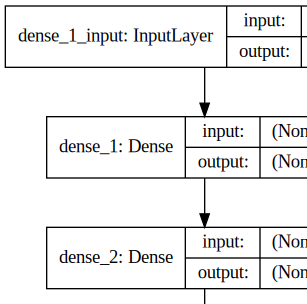

In [2]:
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

network = models.Sequential()

# 렐루 활성화 모델 FC 추가
network.add(layers.Dense(units=16, activation='relu', input_shape=(10,)))

# 또 추가
network.add(layers.Dense(units=16, activation='relu'))

# 시그모이드 활성화 함수를 사용한 완전 연결층(출력층) 추가
network.add(layers.Dense(units=1, activation='sigmoid'))

# 신경망 구조 그리기
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

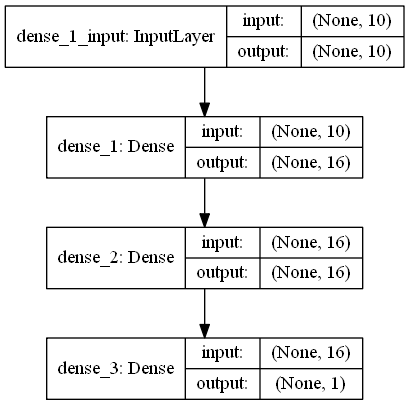

In [3]:
# 신경망 구조를 시각화한 그림을 파일로 저장
plot_model(network, show_shapes=True, to_file='network.png')

* 신경망을 빠르게 시각화 가능한 유틸리티 함수 제공
    * 주피터 노트북에 그리고 싶다면, model_to_dot 함수로 가능하다.
    * show_shapes 파라미터로 입력과 출력의 크기를 보여주어 디버깅에 도움이 된다.
    * 간단한 모델은 show_shapes=True로 지정해볼 수 있다.

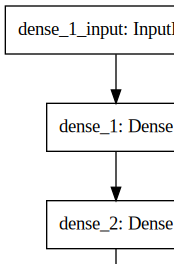

In [5]:
# 신경망 구조 그리기
SVG(model_to_dot(network, show_shapes=False).create(prog="dot", format="svg"))

## 20.15 이미지 분류하기
* 합성곱 신경망으로 이미지를 분류하고 싶다. 케라스에서 가능하다.


In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# 컬러 채널이 처음에 오도록 설정한다.
K.set_image_data_format('channels_first')

# 랜덤 시드 저장
np.random.seed(0)

# 이미지 정보 설정
channels = 1
height = 28
width = 28

# MNIST 데이터에서 훈련 데이터와 타깃 데이터를 로드합니다.
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# 훈련 이미지 데이터를 특성의 크기로 변경
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# 테스트 이미지 데이터를 특성의 크기로 변경
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# 0과 1 사이로 픽셀 강도의 스케일 조정
features_train = data_train / 255
features_test = data_test / 255

# 타깃 데이터를 원핫 인코딩한다.
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# 신경망 모델 제작
network = Sequential()

# 64 필터, 5곱하기 5 윈도, 렐루 활성화 함수 FC 층 추가
network.add(Conv2D(filters=64, kernel_size=(5, 5),input_shape=(channels, width, height), activation='relu'))

# 2*2 윈도 사용하는 최대 풀링층 추가
network.add(MaxPooling2D(pool_size=(2, 2)))

# 드롭아웃 추가
network.add(Dropout(0.5))

# 입력을 일렬로 펼치는 층을 추가
network.add(Flatten())

# 렐루 활성화 함수를 사용한 128개 유닛의 FC 추가
network.add(Dense(units=128, activation="relu"))

# 드롭아웃
network.add(Dropout(0.5))

# 소프트맥스 활성화 FC
network.add(Dense(number_of_classes, activation="softmax"))

# 신경망 모델 설정 완료
network.compile(loss="categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])# 성능 지표

# 신경망 훈련
network.fit(features_train,
target_train,
epochs=2,
verbose=0,
batch_size=1000,
validation_data=(features_test, target_test))# 검증 데이터


* 합성곱 신경망(ConvNet) : 컴퓨터 비전 작업에 매우 효과적 증명된 네트워크 종류
* 피드포워드 신경망에서 각 픽셀이 특정이 되는 식으로 이미지 처리 가능
* 피드 포워드 신경망의 두 가지 문제점

1. 피드포워드 신경망이 픽셀의 공간 구조를 다루지 못한다.
    * 10*10 픽셀의 이미지가 100 픽셀의 특성 벡터로 변환
    * 피드포워드 신경망은 첫 특성(픽셀값)과 10번째 특성 관계가 11번째 특성 관계와 같다.
        * 실제로는 10번째 특성이 이미지에서 첫 번째 특성과 멀리 떨어진 픽셀이다. 
        * 11번째는 첫 번째 픽셀 바로 아래에 있는 픽셀이다.
2. 피드포워드 신경망이 지역 패턴 대신 전체적인 특성의 관계를 학습한다.
    * 물체가 이미지에 나타나는 위치에 상관없이 감지할 수 없다.
    * 이미지는 어느 위치에서든 나타날 수 있다.

* 합성곱 신경망이 해결!
* 개별 이미지 데이터는 2~3개의 차원을 가진다.(높이,너비,깊이)
    * 깊이 차원 : 픽셀의 컬러 기반
        * 흑백 이미지는 깊이가 1개이므로 2차원 행렬
        * 컬러 이미지는 RGB로 깊이가 2개이므로 3차원 텐서로 생각할 수 있다.
    * 너비와 높이, 깊이(특성 맵)에서 세 번째 차원(컬러 값을 가진 차원)은 필터(filter)라 부르는 픽셀이 속한 패턴 나타낸다.
* 풀링층(pooling layer) : 데이터 위에서 윈도를 이동(스트라이드 stride)
    * 윈도가 겹치지 않게 이동하면서 어떤 방식으로 윈도 값 요약하여 데이터 크기 줄인다.
    * 윈도 안에 최댓값을 다음 층으로 보내는 최대 풀링(max pooling)
        * 실용적이다. 매우 빠르게 학습할 모델 파라미터를 많이 만든다.
        * 최대 풀링은 이미지를 줌 아웃하는 것으로 생각할 수 있다.

In [12]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

* 합성곱층과 완전 연결층에 있는 가중치 개수 비교 가능하다.
    * 함성곱층의 가중치 크기 : 입력에 상관없이 필터로 결정
        * 5x5 필터 64개 사용하고, 필터마다 한 개의 절편이 필요하므로, 5x5x64+64 = 1664
    * 완전 연결층 : 입력크기 * 유닛 개수에 절편을 더하면, 9216*128+128 = 1179176개 입니다.

## 20.16 이미지 증식으로 성능 향상하기

* 합성곱 신경망의 성능 향상
* 성능 향상은 ImageDataGenerator 클래스로 이미지 전처리하고 데이터 증식

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 증식을 위해 객체를 제작
augmentation = ImageDataGenerator(
    featurewise_center=True, # ZCA 화이트닝 적용
    zoom_range=0.3, # 이미지 랜덤하게 확대
    width_shift_range=0.2, # 이미지 랜덤하게 이동
    horizontal_flip=True, # 이미지 랜덤하게 뒤집기
    rotation_range=90)

# 'raw/images' 디렉토리에 있는 모든 이미지에 적용
augemnt_images = augmentation.flow_from_directory(
    "raw/images",
    batch_size=32,
    class_mode="binary",
    save_to_dir="processed/images")
    

Found 12665 images belonging to 2 classes.


* 합성곱 신경망 성능 향상 방법 : 이미지 전처리
    * 기본 전처리  포함한 케라스의 ImageDataGenerator 클래스 소개
    * 해결에 feature_wise_center = True : 전체 데이터에 걸쳐 픽셀값 표준화
* 잡음 추가
    * 데이터에 잡음이 추가될 때 신경망의 성능이 향상된다.
    * 잡음을 만났을 때 안정적이고 과적합을 막아준다.
        * 여러 방식으로 이미지를 랜덤 변환하여 샘플에 잡음 추가 가능하다.
            * 이미지 뒤집거나 확대하는 식이다.
            * 조금만 변경해도 모델의 성능을 크게 향상시킬 수 있다.
            * ImageDataGenerator 클래스로 어떤 변환이든 가능하다. 케라스 문서 참고한다.
                * 랜덤 확대, 이동, 반전, 회전 등 일부 변환 적용
                

* flow_from_directory 메서드 출력 : 파이썬 제너레이터 객체
    * 대부분 훈련을 위해 신경망에 이미지 보낼 때 처리하는 것을 선호한다.
    * 훈련 전 모든 이미지를 처리하고 싶다면 이 제너레이터(flow_from_directory)를 반복하면 된다.

            network.fit_generator(augment_images,
                                steps_per_epoch=2000, # 에폭마다 제너레이터를 호출할 횟수
                                epochs=5, # 에폭 횟수
                                validation_data=augemnt_images_test, # 테스트 데이터 제너레이터
                                validation_steps=800) # 테스트 에폭마다 제너레이터 호출 횟수

## 20.17 텍스트 분류하기
* LSTM(Long Short-Term Memory) 순환 신경망을 사용한다.

In [21]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers

# 랜덤 시드 설정
np.random.seed(0)

# 필요한 특성 개수 지정
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터 로드
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 각 샘플이 400개의 특성을 가지도록 패딩하거나 잘라낸다
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# 신경망 모델 제작
network = models.Sequential()

# 임베딩(embedding) 층을 추가합니다.
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# 128개의 유닛을 가진 LSTM 층을 추가
network.add(layers.LSTM(units=128))

# 시그모이드 활성화 함수를 사용한 완전 연결층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델 설정 완료
network.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train,
                        target_train,
                        epochs=3,
                        verbose=0,
                        batch_size=1000,
                        validation_data=(features_test, target_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
# 처음 샘플을 확인한다.
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


* 리스트의 각 정수는 특정 하나의 단어에 대응된다.
    * 리뷰마다 단어의 개수가 다르므로, 샘플 길이가 모두 같지 않다.
    * 그래서 신경망에 입력으로 사용하기 전, 동일 길이로 맞춘다.
    * pad_sequences 함수 : 샘플 데이터에 패딩 추가하여 동일 길이로 맞춘다.

In [23]:
# 처음 샘플 확인
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

* 자연어 처리에서 가장 촉망되는 단어 임베딩(word embedding) 사용
    * 각 단어를 다차원 공간상의 하나의 벡터로 표현한다.
        * 두 벡터 사이의 거리로 단어 간의 유사도 표현 가능
            * 케라스의 Embedding 층을 추가
            * 임베딩 층에 값이 입력되면, 그 단어를 표현하는 벡터 출력
    * 128개의 유닛을 가진 LSTM 층이 앞의 입력에서 얻은 정보를 미래에 사용하도록 만든다.
        * 따라서 순차적인 데이터 처리가 가능하다.
* 이진 분류 문제이므로 하나의 유닛 + 시그모이드 활성화 함수를 사용한 완전 연결된 출력층 추가

* 케라스 LSTM 외에 GRU(Gated Recurrent Unit) 층을 위한 클래스 제공한다. LSTM 클래스를 GRU로 바꾸면 된다. 

In [ ]:
network = models.Sequential()

network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# GRU 128개 유닛 층 추가
network.add(layers.GRU(units=128))

# 시그모이드 출력층 추가
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망 모델의 설정 완료
network.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# 신경망 훈련
history = network.fit(features_train,
                        target_train,
                        epochs=3,
                        verbose=0,
                        batch_size=1000,
                        validation_data=(features_test, target_test)) # 테스트 데이터